In [115]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pickle

In [116]:
data = pd.read_csv('./dumps/diabetes.csv')
display(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Count amount of healthy and people who has diabetes

In this section we will count amount and percentage of people who has diabetes and healthy people.

In [117]:
DIABETES = data[data['Outcome'] == 1]
HEALTHY = data[data['Outcome'] == 0]

DIABETES_COLOR = 'lightcoral'
HEALTHY_COLOR = 'cornflowerblue'

In [118]:
def data_count():
    trace = go.Bar(
        x=data['Outcome'].value_counts().values.tolist(),
        y=['Healthy', 'Diabetics'],
        orientation='h',
        text=data['Outcome'].value_counts().values.tolist(),
        marker=dict(
            color=[HEALTHY_COLOR, DIABETES_COLOR]
        )
    )

    layout = go.Layout(
        title='Count of people with diabetes and healthy',
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()


def data_percentage():
    trace = go.Pie(
        labels=['Healthy', 'Diabetics'],
        values=data['Outcome'].value_counts().values.tolist(),
        marker=dict(
            colors=[HEALTHY_COLOR, DIABETES_COLOR]
        )
    )

    layout = go.Layout(
        title='Percentage of people with diabetes and healthy',
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()

In [119]:
data_count()
data_percentage()

# Missing values

Right now there are lots of missing values like insulin or skin thickness that are equal to zero.

In [120]:
data[['Insulin', 'SkinThickness', 'Glucose', 'BloodPressure', 'BMI']] = data[['Insulin', 'SkinThickness', 'Glucose', 'BloodPressure', 'BMI']].replace(0, np.NaN)

In [121]:
def missing_values_percent_bar(dataset, key):
    trace = go.Bar(
        x=(dataset.isnull().sum() / dataset.shape[0] * 100).values.tolist(),
        y=dataset.columns,
        orientation='h',
        text=round(dataset.isnull().sum() / dataset.shape[0] * 100, 3).values.tolist(),
        marker=dict(
            color='lightcoral'
        )
    )

    layout = go.Layout(
        title=f'Missing values in {key} in percentage',
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()

In [122]:
missing_values_percent_bar(data, 'Outcome')

Right now lets fond out correlation between features to fill in missing values.

In [123]:
def correlation_matrix():
    corr = data.corr()

    trace = go.Heatmap(
        x=data.columns,
        y=data.columns,
        z=corr.values,
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='Viridis'
    )

    layout = go.Layout(
        title='Correlation matrix',
    )

    fig = go.Figure(data=[trace], layout=layout)

    fig.show()

Correlation matrix is used to find out correlation between features. If correlation is high, then we can fill in missing values with mean or median. For example, if we have high correlation between Glucose and Insulin, then we can fill in missing values in Insulin with mean or median of Glucose.

In [124]:
correlation_matrix()

# Fill in missing values
Let's use median to fill in missing values. You would ask why median? Because median is not affected by outliers. Outlier is a value that is significantly higher or lower than the rest of the values in the dataset. For example, if we have 1000 values and 999 of them are 1 and 1 value is 1000, then mean would be 2. But median would be 1. That's why we use median to fill in missing values.

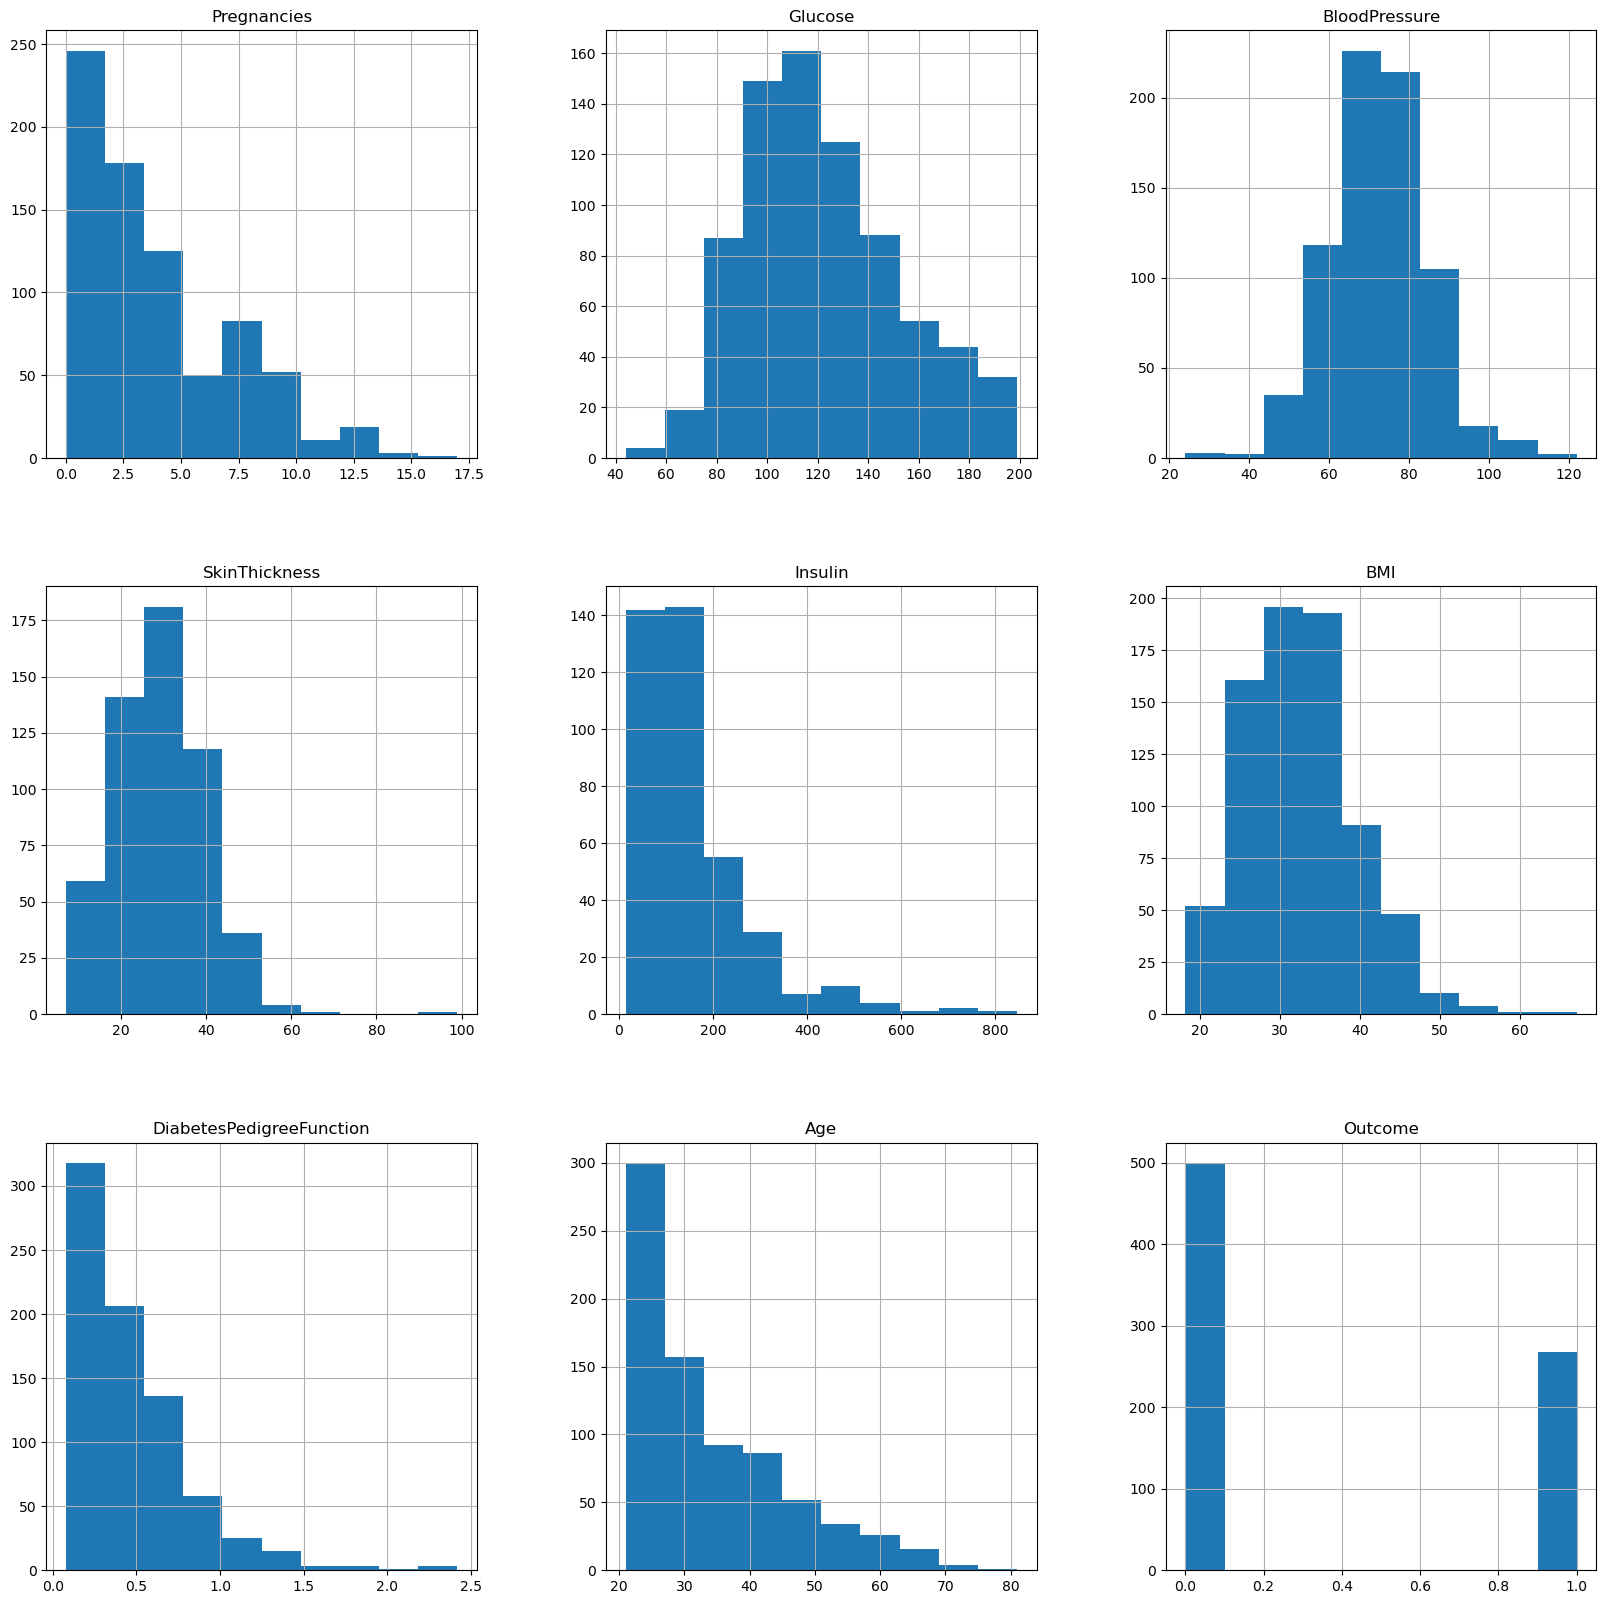

In [125]:
distribution = data.hist(figsize=(20, 20), )

Let's 

In [126]:
filled_data = data.copy()
filled_data.fillna({
    'Insulin': filled_data['Insulin'].mean(),
    'SkinThickness': filled_data['SkinThickness'].median(),
    'Glucose': filled_data['Glucose'].median(),
    'BloodPressure': filled_data['BloodPressure'].median(),
    'BMI': filled_data['BMI'].mean()
}, inplace=True)

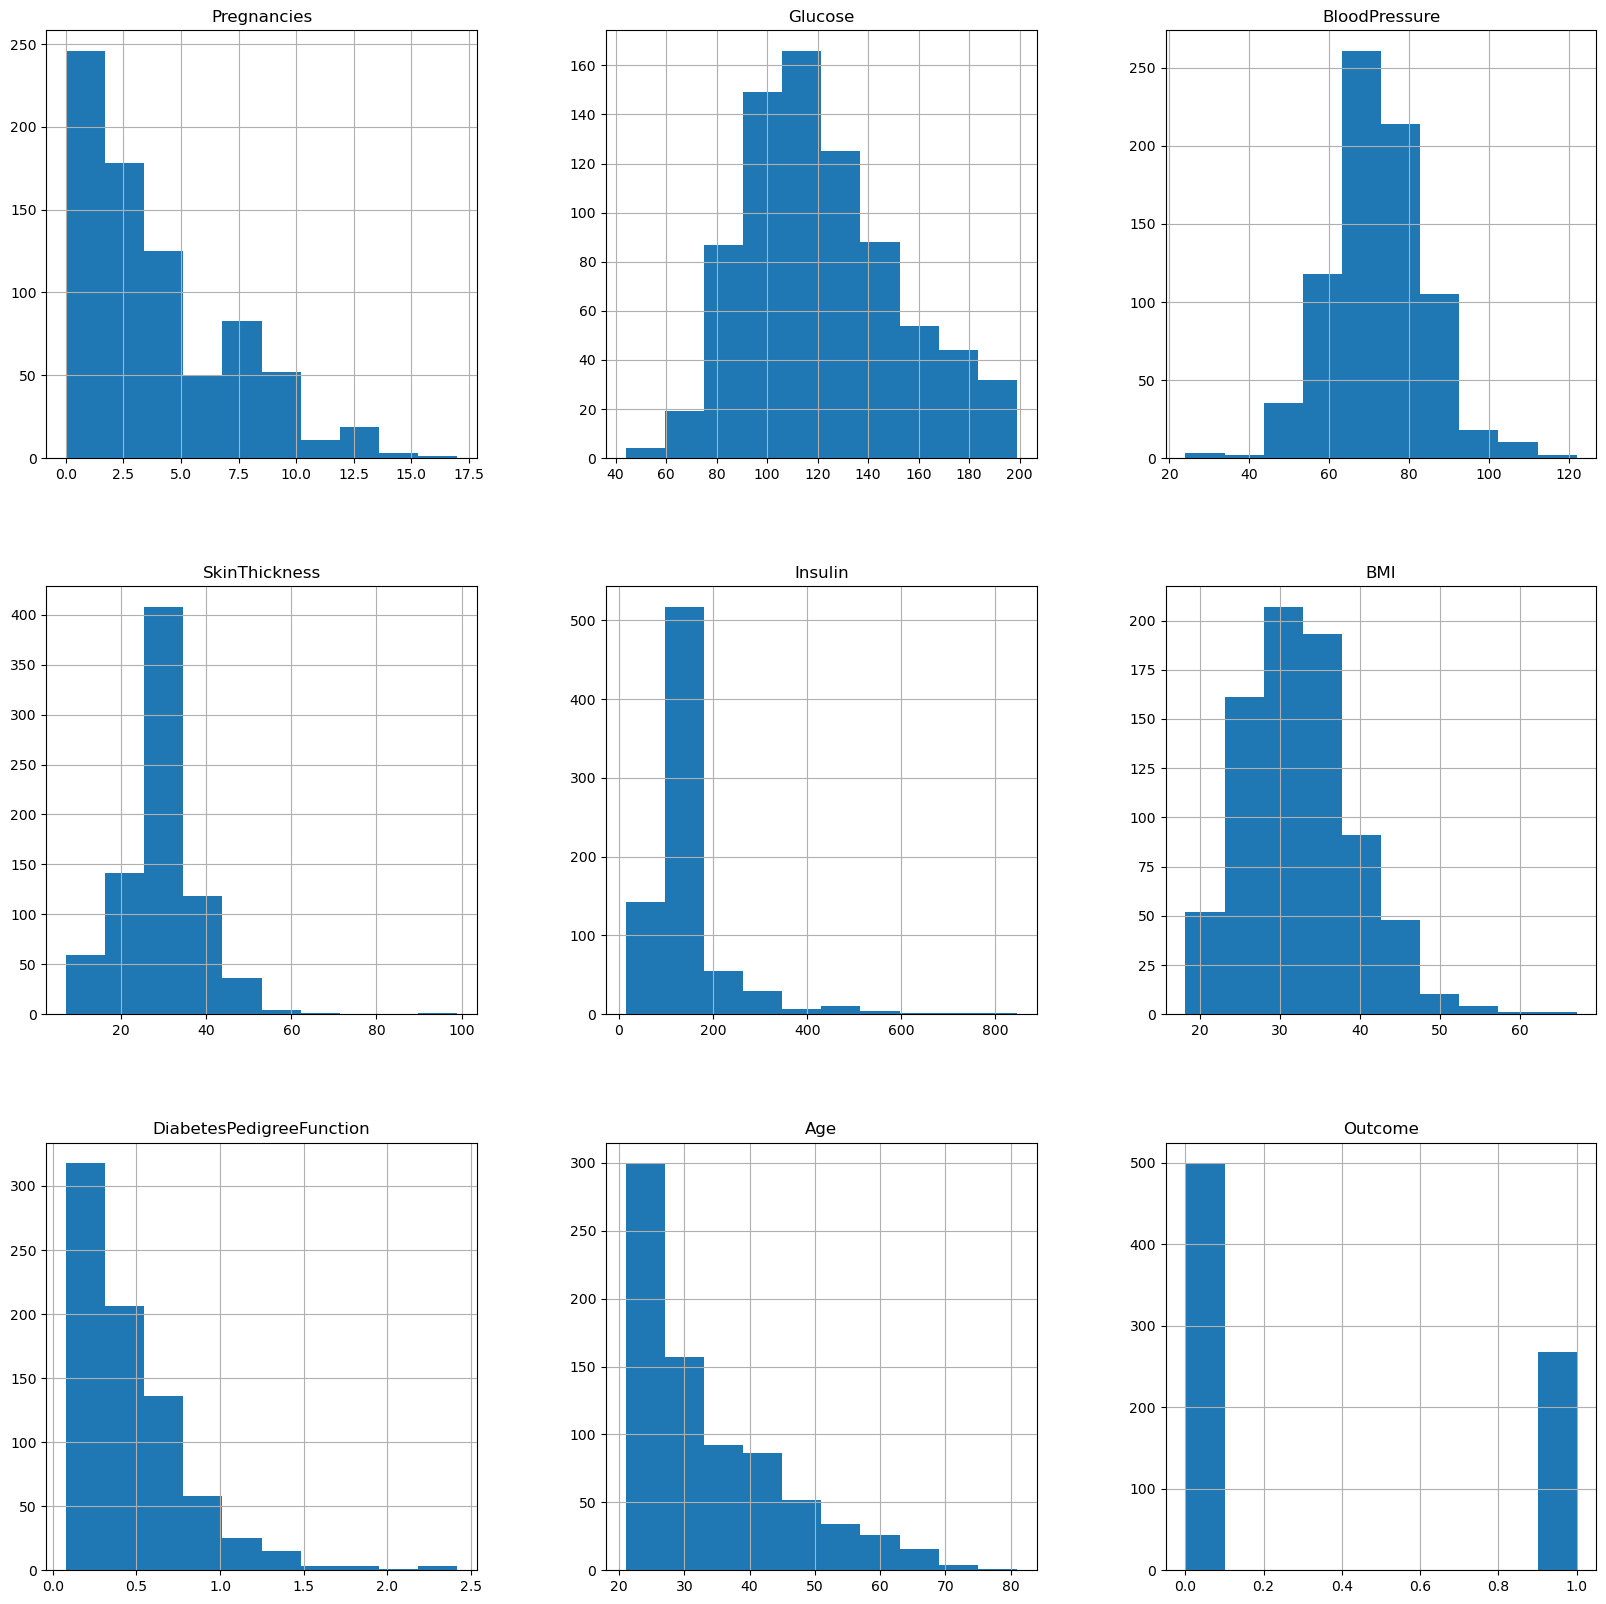

In [127]:
distribution_filled = filled_data.hist(figsize=(20, 20))

In [128]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(filled_data.drop(["Outcome"], axis=1), ),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [129]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,1.465506e-01,1.548980,5.484909,-0.020496


In [130]:
Y = filled_data.Outcome

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1 / 3, random_state=42, stratify=Y)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

knn = KNeighborsClassifier()

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 76.5625 % and k = [11]


In [ ]:
# randomized search



In [133]:
# dumping the model
pickle.dump(knn, open('./dumps/knn_76perc.pkl', 'wb'))
